In [68]:
import numpy as np
import matplotlib.pyplot as plt 
import importlib
import HeuristicsAlgo
importlib.reload(HeuristicsAlgo)
from HeuristicsAlgo import (
    read_distance_matrix, print_solution_route, HillClimbing, 
    RandomWalk, SimulatedAnnealing, GeneticAlgorithm, 
    TabuSearch, ParticalSwarmOptimization, AntColonyOptimization, CuckooSearch
)
np.random.seed(5080)

In [26]:
distance_matrix, store_names = read_distance_matrix('adjacency_matrix.json')

In [14]:
max_iter = 500
HC = HillClimbing(distance_matrix, max_iter)
HC.solve(verbose = False)
HC_record = HC.best_length_record
HC_best_sol = HC.best_route

In [15]:
max_iter = 500
RW = RandomWalk(distance_matrix, max_iter)
RW.solve(verbose = False)
RW_record = RW.best_length_record
RW_best_sol = RW.best_route

In [16]:
max_iter = 500
init_temp = 100
stop_temp = 1
max_patience = 3
eplison = 0.025 #Don't decrease to fast
SA = SimulatedAnnealing(distance_matrix, max_iter)
SA.solve(init_temp, stop_temp, max_iter, max_patience, eplison, verbose = False)
SA_record = SA.best_length_record
SA_best_sol = SA.best_route

In [17]:
pop_size = 25 #From paper
max_iter = 20
mutation_rate = 0.01 #uniform crossover, prob = 0.01
GA = GeneticAlgorithm(distance_matrix, max_iter)
GA.solve(pop_size, max_iter, mutation_rate, verbose = False)
GA_record = GA.best_length_record
GA_best_sol = GA.best_route

In [18]:
max_iter = 500
max_tabu_list_length = 5
TS = TabuSearch(distance_matrix, max_iter)
TS.solve(max_tabu_list_length, verbose = False
)
TS_record = TS.best_length_record
TS_best_sol = TS.best_route

In [19]:
pop_size = 25 
max_iter = 20
PSO = ParticalSwarmOptimization(distance_matrix, max_iter)
PSO.solve(max_iter, pop_size, verbose = False)
PSO_record = PSO.best_length_record
PSO_best_sol = PSO.best_route

In [20]:
Q = 100 #starting pheromone
rho = 0.1 #evaporate rate
pop_size = 25
alpha = 10
beta = 20
max_iter = 20
ACO = AntColonyOptimization(distance_matrix, max_iter)
ACO.solve(max_iter, pop_size, Q, rho , alpha, beta, verbose = False)
ACO_record = ACO.best_length_record
ACO_best_sol = ACO.best_route

In [66]:
max_iter = 500
num_nests = 10
CS = CuckooSearch(distance_matrix, max_iter)
CS.solve(num_nests)
CS_record = CS.best_length_record
CS_best_sol = CS.best_route

# Best solution of each algorithm

In [70]:
print_solution_route("Hill climbing algorithm", HC_record ,HC_best_sol, store_names)
print_solution_route("Random walk algorithm", RW_record, RW_best_sol, store_names)
print_solution_route("Simulated annealing algorithm", SA_record, SA_best_sol, store_names)
print_solution_route("Genetic algortihm", GA_record, GA_best_sol, store_names)
print_solution_route("Tabu search", TS_record,TS_best_sol, store_names)
print_solution_route("Particle swarm optimization", PSO_record, PSO_best_sol, store_names)
print_solution_route("Ant colony optimization", ACO_record, ACO_best_sol, store_names)
print_solution_route("Cacukoo search", CS_record, CS_best_sol, store_names)

Hill climbing algorithm result:
The best route length is 35.964
Best route:
鑫貿->中貿->馥樺->香城->經貿->港勝->港捷->中研->胡適->港環球->港高鐵->忠陽->聯成->港運->凱松->鵬馳->玉成->向揚->港興->佳樂->港泰->慈愛->重陽->昆陽->雄強->新福玉->港德->港麗->耀港->庄研->華技->研究->聯坊->中坡->玉德->林坊

Random walk algorithm result:
The best route length is 32.526
Best route:
庄研->華技->中研->胡適->港環球->港麗->港泰->耀港->研究->經貿->中貿->馥樺->聯成->港德->新福玉->中坡->港運->凱松->昆陽->忠陽->玉成->向揚->重陽->慈愛->港興->港高鐵->佳樂->港勝->鑫貿->港捷->香城->鵬馳->雄強->聯坊->林坊->玉德

Simulated annealing algorithm result:
The best route length is 27.01
Best route:
港捷->耀港->華技->庄研->中研->胡適->研究->港勝->馥樺->香城->佳樂->港興->港環球->港高鐵->港麗->聯坊->港德->新福玉->中坡->玉德->林坊->慈愛->重陽->向揚->凱松->港運->昆陽->忠陽->玉成->鵬馳->雄強->聯成->港泰->經貿->中貿->鑫貿

Genetic algortihm result:
The best route length is 39.164
Best route:
中貿->港興->慈愛->港麗->聯成->雄強->鵬馳->玉成->忠陽->林坊->新福玉->港運->凱松->聯坊->中坡->玉德->港泰->重陽->向揚->港德->昆陽->佳樂->港高鐵->港環球->經貿->香城->耀港->港勝->港捷->庄研->華技->胡適->中研->鑫貿->馥樺->研究

Tabu search result:
The best route length is 27.67
Best route:
港運->耀港->研究->中研->華技->庄研->胡適->港泰->港麗->重陽->忠陽->昆陽->

# FE plot

In [23]:
max_iter = 500
HC_plt = np.concatenate(
    [HC_record, np.repeat(HC_record[-1], max_iter - len(HC_record))]
)
SA_plt = np.concatenate(
    [SA_record, np.repeat(SA_record[-1], max_iter - len(SA_record))]
)
GA_plt = np.repeat(GA_record, pop_size)
PSO_plt = np.repeat(PSO_record, pop_size)
ACO_plt = np.repeat(ACO_record, pop_size)

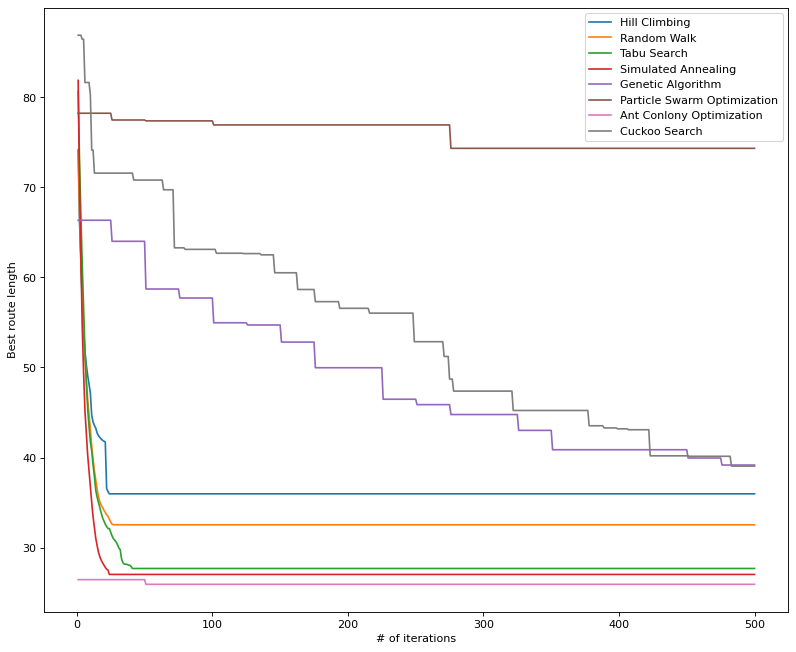

In [29]:
x = list(range(1, max_iter + 1))
plt.figure(figsize=(12, 10), dpi=80)
plt.plot(x, HC_plt, label = "Hill Climbing")
plt.plot(x, RW_record, label = "Random Walk")
plt.plot(x, TS_record, label = "Tabu Search")
plt.plot(x, SA_plt, label = "Simulated Annealing")
plt.plot(x, GA_plt, label = "Genetic Algorithm")
plt.plot(x, PSO_plt, label = "Particle Swarm Optimization")
plt.plot(x, ACO_plt, label = "Ant Conlony Optimization")
plt.plot(x, CS_record, label = "Cuckoo Search")
plt.xlabel("# of iterations")
plt.ylabel("Best route length")
plt.legend()
plt.savefig("FE_plot.png")
plt.show()